# Feature Scaling

Tujuan:
- Memudahkan perhitungan
- Memudahkan dalam membandingkan feature yang berbeda satuan
- Memudahkan dalam membandingkan feature yang valuenya selisih jauh
- Merubah sebaran/distribusi data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<hr> 

### __A. Standardization__

- Rata-rata jarak data point terhadap mean dalam satuan standard deviasi.

- Standardisasi $\displaystyle z_{score} = \frac {x - \bar{x}} {s}$ di mana $\displaystyle s = \sqrt {\frac {\sum (x - \bar{x})^2} {n - \textrm{ddof}}}$

- ```ddof``` degree of freedom: pandas = 1 (sample), numpy = 0 (populasi), sklearn = 0 (populasi).

- Data terstandardisasi memilik mean ~ 0 dan standard deviasi ~ 1.

- Standardisasi tidak merubah sebaran data.

In [2]:
df = pd.DataFrame({
    'TB': [1.72, 1.81, 1.93, 1.67, 1.85, 1.66, 1.59, 1.76, 1.88, 1.78],
    'BB': [76, 65, 87, 55, 60, 78, 98, 77, 74, 64]
})

In [4]:
df.head(3)

,TB,BB
0,1.72,76
1,1.81,65
2,1.93,87


In [7]:
TBmean = df['TB'].mean()
TBstd1 = df['TB'].std()           # pandas ddof = 1
TBstd2 = np.std(df['TB'], ddof=0) # numpy ddof = 0
TBmean, TBstd1, TBstd2

(1.765, 0.10679679562400528, 0.10131633629380801)

In [13]:
BBmean = df['BB'].mean()
BBstd1 = df['BB'].std()           # pandas ddof = 1
BBstd2 = np.std(df['BB'], ddof=0) # numpy ddof = 0
BBmean, BBstd1, BBstd2

(73.4, 12.946041866145807, 12.281693694275232)

<hr>

- Standardisasi $\displaystyle z_{score} = \frac {x - \bar{x}} {s}$

- Data terstandardisasi: mean $\bar{x}$ ~ 0 dan std $s$ ~ 1.

- Outlier berdasarkan $z_{score}$:
    - High outlier jika $z_{score} > 2$ atau $z_{score} > 2.5$
    - Low outlier jika $z_{score} < -2$ atau $z_{score} < -2.5$

In [15]:
df['z TB'] = (df['TB'] - df['TB'].mean()) / np.std(df['TB'])
df['z BB'] = (df['BB'] - df['BB'].mean()) / np.std(df['BB'])
df.head(3)

,TB,BB,z TB,z BB
0,1.72,76,-0.444153,0.211697
1,1.81,65,0.444153,-0.683945
2,1.93,87,1.628563,1.107339


In [16]:
# data terstandardisasi: mean ~ 0 & std ~ 1
print(df['z TB'].mean(), np.std(df['z TB']))
print(df['z BB'].mean(), np.std(df['z BB']))

8.854028621385623e-16 1.0
-4.440892098500626e-16 1.0


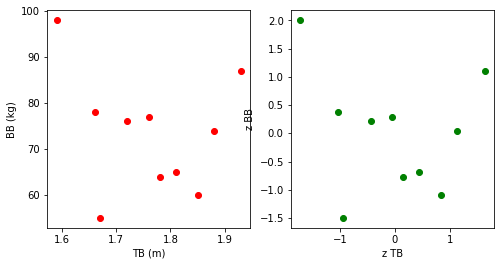

In [19]:
# standardisasi tidak merubah sebaran data
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(df['TB'], df['BB'], 'ro')
plt.xlabel('TB (m)'); plt.ylabel('BB (kg)')
plt.subplot(122)
plt.plot(df['z TB'], df['z BB'], 'go')
plt.xlabel('z TB'); plt.ylabel('z BB')
plt.show()

<hr>

- Rumus standardisasi $\displaystyle z_{score} = \frac {x - \bar{x}} {s}$, maka untuk mengembalikan ke nilai semula $\displaystyle x = (z_{score} \cdot s) + \bar{x}$

In [22]:
df['inv z TB'] = (df['z TB'] * np.std(df['TB'])) + df['TB'].mean()
df['inv z BB'] = (df['z BB'] * np.std(df['BB'])) + df['BB'].mean()
df

,TB,BB,z TB,z BB,inv z TB,inv z BB
0,1.72,76,-0.444153,0.211697,1.72,76.0
1,1.81,65,0.444153,-0.683945,1.81,65.0
2,1.93,87,1.628563,1.107339,1.93,87.0
3,1.67,55,-0.937657,-1.498165,1.67,55.0
4,1.85,60,0.838957,-1.091055,1.85,60.0
5,1.66,78,-1.036358,0.374541,1.66,78.0
6,1.59,98,-1.727263,2.002981,1.59,98.0
7,1.76,77,-0.049350,0.293119,1.76,77.0
8,1.88,74,1.135059,0.048853,1.88,74.0
9,1.78,64,0.148051,-0.765367,1.78,64.0


<hr> 

### __B. Standardization on Sklearn__

#### __B1.__ Using ```preprocessing.scale()```


In [25]:
from sklearn import preprocessing

In [31]:
df = pd.DataFrame({
    'TB': [1.72, 1.81, 1.93, 1.67, 1.85, 1.66, 1.59, 1.76, 1.88, 1.78],
    'BB': [76, 65, 87, 55, 60, 78, 98, 77, 74, 64]
})
df.head(3)

,TB,BB
0,1.72,76
1,1.81,65
2,1.93,87


In [32]:
ZTB = preprocessing.scale(df['TB'])
ZBB = preprocessing.scale(df['BB'])
df['z TB'] = ZTB
df['z BB'] = ZBB

In [34]:
df.head(5)

,TB,BB,z TB,z BB
0,1.72,76,-0.444153,0.211697
1,1.81,65,0.444153,-0.683945
2,1.93,87,1.628563,1.107339
3,1.67,55,-0.937657,-1.498165
4,1.85,60,0.838957,-1.091055


<hr> 

#### __B2.__ Using ```preprocessing.StandardScaler()```


In [37]:
df = pd.DataFrame({
    'TB': [1.72, 1.81, 1.93, 1.67, 1.85, 1.66, 1.59, 1.76, 1.88, 1.78],
    'BB': [76, 65, 87, 55, 60, 78, 98, 77, 74, 64]
})
df.head(2)

,TB,BB
0,1.72,76
1,1.81,65


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
# create scaler
scaler.fit(df[['TB', 'BB']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
# transformasi: melakukan standardisasi
z = scaler.transform(df[['TB', 'BB']])
z

array([[-0.44415345,  0.21169719],
       [ 0.44415345, -0.68394476],
       [ 1.62856264,  1.10733913],
       [-0.93765728, -1.4981647 ],
       [ 0.83895651, -1.09105473],
       [-1.03635804,  0.37454118],
       [-1.7272634 ,  2.00298107],
       [-0.04935038,  0.29311918],
       [ 1.13505881,  0.0488532 ],
       [ 0.14805115, -0.76536675]])

In [42]:
df['z TB'] = z[:, 0]
df['z BB'] = z[:, 1]
df

,TB,BB,z TB,z BB
0,1.72,76,-0.444153,0.211697
1,1.81,65,0.444153,-0.683945
2,1.93,87,1.628563,1.107339
3,1.67,55,-0.937657,-1.498165
4,1.85,60,0.838957,-1.091055
5,1.66,78,-1.036358,0.374541
6,1.59,98,-1.727263,2.002981
7,1.76,77,-0.049350,0.293119
8,1.88,74,1.135059,0.048853
9,1.78,64,0.148051,-0.765367


In [46]:
# inverse transform: mengembalikan value semula
inv = scaler.inverse_transform(
    df[['z TB', 'z BB']]
)
inv

array([[ 1.72, 76.  ],
       [ 1.81, 65.  ],
       [ 1.93, 87.  ],
       [ 1.67, 55.  ],
       [ 1.85, 60.  ],
       [ 1.66, 78.  ],
       [ 1.59, 98.  ],
       [ 1.76, 77.  ],
       [ 1.88, 74.  ],
       [ 1.78, 64.  ]])

In [47]:
df['inv z TB'] = inv[:, 0]
df['inv z BB'] = inv[:, 1]
df

,TB,BB,z TB,z BB,inv z TB,inv z BB
0,1.72,76,-0.444153,0.211697,1.72,76.0
1,1.81,65,0.444153,-0.683945,1.81,65.0
2,1.93,87,1.628563,1.107339,1.93,87.0
3,1.67,55,-0.937657,-1.498165,1.67,55.0
4,1.85,60,0.838957,-1.091055,1.85,60.0
5,1.66,78,-1.036358,0.374541,1.66,78.0
6,1.59,98,-1.727263,2.002981,1.59,98.0
7,1.76,77,-0.049350,0.293119,1.76,77.0
8,1.88,74,1.135059,0.048853,1.88,74.0
9,1.78,64,0.148051,-0.765367,1.78,64.0


<hr>

### __C. Contoh Kasus__

In [74]:
df = pd.DataFrame({
    'mesin': [1000, 2000, 3000, 4000, 5000],
    'harga': [10, 25, 35, 55, 80]
})
# df

In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[['mesin']], df['harga'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
df['harga"'] = model.predict(df[['mesin']])
df

,mesin,harga,"harga"""
0,1000,10,7.0
1,2000,25,24.0
2,3000,35,41.0
3,4000,55,58.0
4,5000,80,75.0


In [83]:
# 2. standardisasi pada X & Y: 
# Kurang efisien => hasilnya berupa z-score prediksi
# untuk mendapatkan prediksi aslinya, harus inverse transform
# efektifnya: hanya feature X saja yg distandardisasi

scalerX = StandardScaler()
scalerY = StandardScaler()

In [84]:
df['z mesin'] = scalerX.fit_transform(df[['mesin']])
df['z harga'] = scalerY.fit_transform(df[['harga']])
df

,mesin,harga,"harga""",z mesin,z harga,"z harga"""
0,1000,10,7.0,-1.414214,-1.271945,-1.395037e+00
1,2000,25,24.0,-0.707107,-0.656488,-6.975184e-01
2,3000,35,41.0,0.000000,-0.246183,-4.440892e-17
3,4000,55,58.0,0.707107,0.574427,6.975184e-01
4,5000,80,75.0,1.414214,1.600189,1.395037e+00


In [85]:
model2 = LinearRegression()
model2.fit(df[['z mesin']], df['z harga'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
df['z harga"'] = model2.predict(df[['z mesin']])
df

,mesin,harga,"harga""",z mesin,z harga,"z harga"""
0,1000,10,7.0,-1.414214,-1.271945,-1.395037e+00
1,2000,25,24.0,-0.707107,-0.656488,-6.975184e-01
2,3000,35,41.0,0.000000,-0.246183,-4.440892e-17
3,4000,55,58.0,0.707107,0.574427,6.975184e-01
4,5000,80,75.0,1.414214,1.600189,1.395037e+00


In [88]:
df['harga"2'] = scalerY.inverse_transform(df['z harga"'])
df

,mesin,harga,"harga""",z mesin,z harga,"z harga""","harga""2"
0,1000,10,7.0,-1.414214,-1.271945,-1.395037e+00,7.0
1,2000,25,24.0,-0.707107,-0.656488,-6.975184e-01,24.0
2,3000,35,41.0,0.000000,-0.246183,-4.440892e-17,41.0
3,4000,55,58.0,0.707107,0.574427,6.975184e-01,58.0
4,5000,80,75.0,1.414214,1.600189,1.395037e+00,75.0


In [96]:
# predict harga untuk mesin 6000 dengan model kedua
scalerY.inverse_transform(
    model2.predict(
        scalerX.transform([[6000]])
    )
)[0]

91.99999999999997

In [98]:
# Efektif: standardisasi feature X & y target asli => model

df = pd.DataFrame({
    'mesin': [1000, 2000, 3000, 4000, 5000],
    'harga': [10, 25, 35, 55, 80]
})
# df

In [101]:
scaler = StandardScaler()
df['z mesin'] = scaler.fit_transform(df[['mesin']])

In [103]:
model = LinearRegression()

# training X terstandardisasi, Y tetap asli
model.fit(df[['z mesin']], df['harga'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
df['harga"'] = model.predict(df[['z mesin']])
df

,mesin,harga,z mesin,"harga"""
0,1000,10,-1.414214,7.0
1,2000,25,-0.707107,24.0
2,3000,35,0.000000,41.0
3,4000,55,0.707107,58.0
4,5000,80,1.414214,75.0


In [107]:
# prediksi harga untuk mesin 6000?
model.predict(scaler.transform([[6000]]))[0]

92.0

Exercise: [https://www.kaggle.com/harlfoxem/housesalesprediction](https://www.kaggle.com/harlfoxem/housesalesprediction)